In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/omar.elkhawass/Downloads/zomato.csv')

In [2]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
#drop non relevant columns
df.drop(['url','address','phone','dish_liked','reviews_list','menu_item','cuisines'], axis = 1, inplace = True)

In [5]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [7]:
#rename columns to adhere with naming conventions
df.rename(columns = {'approx_cost(for two people)':'cost_for2', 'listed_in(type)':'type', 'listed_in(city)':'city'}, inplace = True)

In [8]:
df['rate'].value_counts(dropna = False)

NaN       7775
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 65, dtype: int64

In [9]:
#replacing 'NEW' values in 'rate' column with NAN values
df['rate'] = df['rate'].replace('NEW', np.nan)

#getting rid of '/5' in 'rate' column
df['rate'] = df['rate'].str.slice(stop = 3)
df['rate'] = pd.to_numeric(df['rate'], errors = 'coerce')

#filling all NaN values with mean value
df['rate'].fillna(df['rate'].mean(), inplace = True)

In [10]:
df['cost_for2'].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: cost_for2, Length: 70, dtype: int64

In [11]:
#converting 'cost_for2' to numeric
df['cost_for2'] = df['cost_for2'].str.replace(',', '')
df['cost_for2'] = pd.to_numeric(df['cost_for2'], errors = 'coerce')

In [12]:
#dropping remaining NaN values in dataset
df.dropna(inplace = True)
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cost_for2       0
type            0
city            0
dtype: int64

In [13]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cost_for2,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari


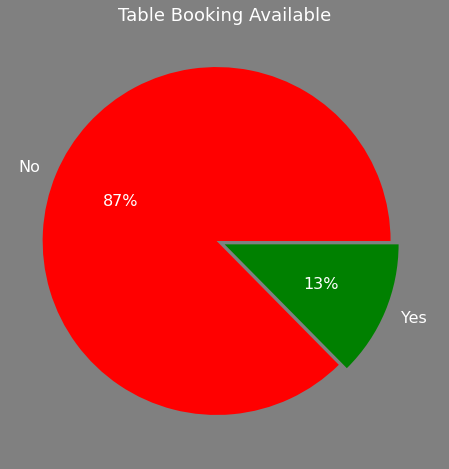

In [14]:
#visualizing which restaurants offer table booking
table_book_count = df['book_table'].value_counts()

fig = plt.figure(figsize = (8,8))
plt.pie(table_book_count, labels = table_book_count.index, autopct = '%1.0f%%', \
       textprops = {'fontsize':16, 'color':'white'}, explode = [0.05,0], colors = ['red','green'])
plt.title('Table Booking Available', size = 18, color = 'white')
fig.set_facecolor('grey')
plt.show()

/Users/omar.elkhawass/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


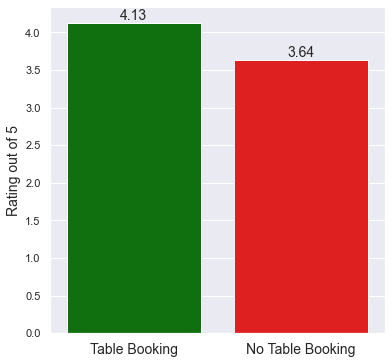

In [15]:
#average rating for restaurants offering table booking vs restaurants not offering table booking 
rate_book = {
    'Table Booking' : round(df[df['book_table'] == 'Yes']['rate'].mean(), 2),
    'No Table Booking' : round(df[df['book_table'] == 'No']['rate'].mean(), 2)
}

fig = plt.figure(figsize = (6,6))
ax = sns.set(style = 'darkgrid')
ax = sns.barplot(list(rate_book.keys()), list(rate_book.values()), palette = ['green','red'])
ax.set_ylabel('Rating out of 5', size = 14)
ax.set_xticklabels(list(rate_book.keys()), size = 14)
for bars in ax.containers:
    ax.bar_label(bars, size = 14)

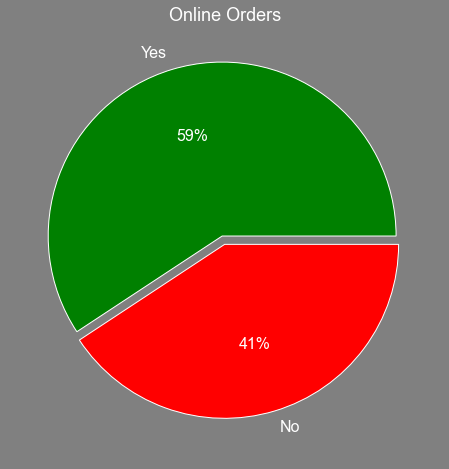

In [16]:
#visualizing which restaurants offer online orders
online_order_count = df['online_order'].value_counts()

fig = plt.figure(figsize = (8,8))
plt.pie(online_order_count, labels = online_order_count.index, autopct = '%1.0f%%', \
        textprops = {'fontsize':16, 'color':'white'}, explode = [0.05,0], colors = ['green','red'])
plt.title('Online Orders', size = 18, color = 'white')
fig.set_facecolor('grey')
plt.show()

/Users/omar.elkhawass/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


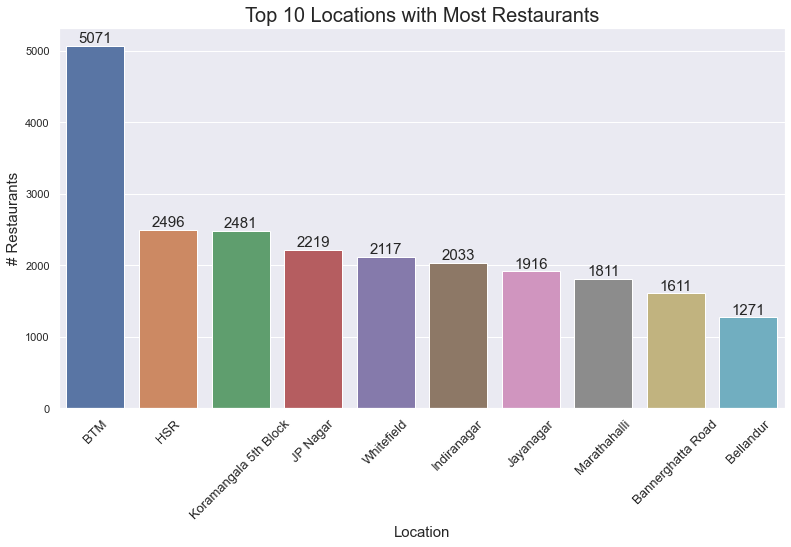

In [17]:
#which locations have the most restaurants 
top10loc = df['location'].value_counts().head(10)
plt.figure(figsize = (13,7))
ax = sns.barplot(top10loc.index, top10loc)
ax.set_title('Top 10 Locations with Most Restaurants', size = 20)
ax.set_ylabel('# Restaurants', size = 15)
ax.set_xlabel('Location', size = 15)
ax.set_xticklabels(top10loc.index, rotation = 45, size = 13)
for bars in ax.containers:
    ax.bar_label(bars, size = 15)

/Users/omar.elkhawass/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


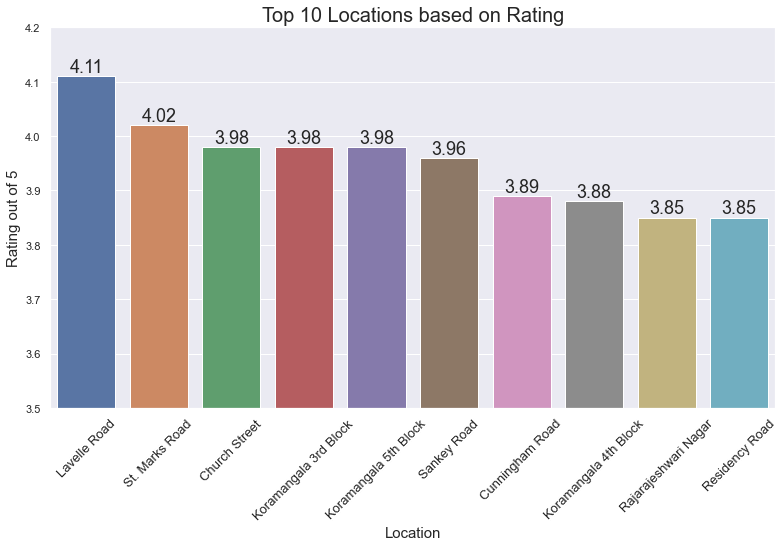

In [18]:
#top 10 locations with highest rate averages 
top10loc_rate = df.groupby('location')['rate'].mean().round(2).nlargest(10)
plt.figure(figsize = (13,7))
plt.ylim(3.5,4.2)
ax = sns.barplot(top10loc_rate.index, top10loc_rate)
ax.set_title('Top 10 Locations based on Rating', size = 20)
ax.set_ylabel('Rating out of 5', size = 15)
ax.set_xlabel('Location', size = 15)
ax.set_xticklabels(top10loc_rate.index, rotation = 45, size = 13)
for bars in ax.containers:
    ax.bar_label(bars, size = 18)

In [19]:
#table showing top 10 most expensive locations (based on average 'cost_for2') alongside their average rates 
top_10_cost = pd.DataFrame(df.groupby('location')['cost_for2','rate'].mean().round(2))
top_10_cost.sort_values(by = 'cost_for2', ascending = False, inplace = True)
top_10_cost.nlargest(10, columns = 'cost_for2')

/var/folders/xn/ch7_g73x321163vvvzkdpbtw0000gn/T/ipykernel_65265/3097908091.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_cost = pd.DataFrame(df.groupby('location')['cost_for2','rate'].mean().round(2))


,cost_for2,rate
location,,
Sankey Road,2505.56,3.96
Race Course Road,1309.35,3.78
Lavelle Road,1307.93,4.11
MG Road,1155.70,3.83
Infantry Road,1062.25,3.79
Residency Road,966.32,3.85
St. Marks Road,883.67,4.02
Langford Town,883.33,3.81
Cunningham Road,864.97,3.89


In [20]:
# Analyzing relationship between 'rate' and 'cost_for2' 
corr = df['rate'].corr(df['cost_for2']).round(3)
if corr >= 0.5:
    print('Strong Correlation of', corr, 'between restaurant rating and cost for 2')
elif corr >= 0.3:
    print('Moderate Correlation of', corr, 'between restaurant rating and cost for 2')
else:
    print('Weak Correlation of', corr, 'between restaurant rating and cost for 2')

print('\n')

Moderate Correlation of 0.366 between restaurant rating and cost for 2




/Users/omar.elkhawass/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


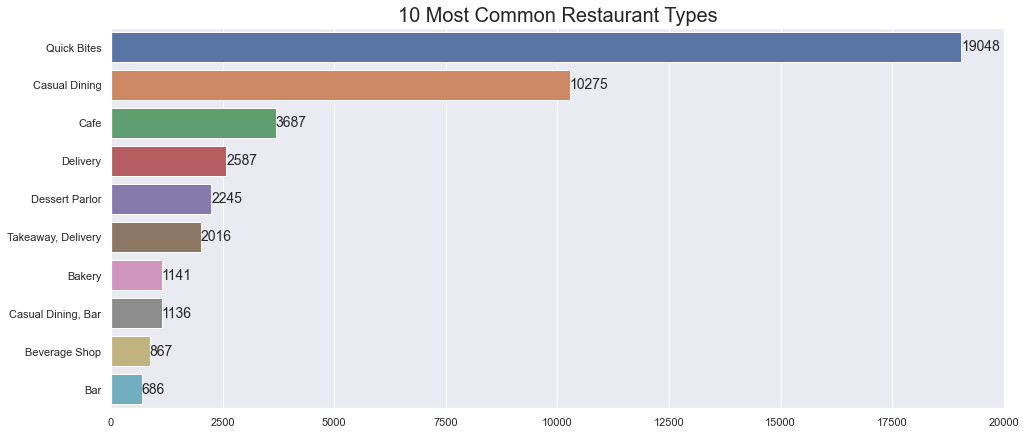

In [21]:
#top 10 most common restaurant types 
top10_rtype = df['rest_type'].value_counts().head(10)
plt.figure(figsize = (16,7))
ax = sns.barplot(top10_rtype, top10_rtype.index)
ax.set_title('10 Most Common Restaurant Types', size = 20)
ax.set_xlabel('')
for bars in ax.containers:
    ax.bar_label(bars, size = 14)